# Efecto Túnel

Considere una partícula moviéndose por la izquierda hacia una barrera de potencial de longitud finita con valor V en $0 \leq x \leq  L$, es decir:

$$
V(x) = \left\{
  \begin{array}{lll}
  0      & \mathrm{si\ } x < 0 & \text{I}\\
  V & \mathrm{si\ } 0 \leq x \leq L & \text{II} \\
  0 & \mathrm{si\ } L \le x & \text{III} \\
  \end{array}
  \right.
$$

<img src="images/tunel-barrera-finita.png" alt="Figura de tunel de barrera finita" width="300"/>

En este caso no hay cuantización, por lo que la partícula puede tomar cualquier valor de energía. Analizaremos dos casos particulares

1. La partícula tiene menor energía que el potencial $E<V$.
2. La partícula tiene mayor energía que el potencial $E>V$.

## Energía menor que el potencial $E < V$

```{admonition} Para pensar
:class: tip

De manera clásica, cuando la partícula tiene menor energía que el potencial, $E<V$, no debería poder pasar a la región II ni a la región III. ¿Qué pasará cuánticamente? 
```

El sistema puede analizarse por regiones
```{admonition} Inserto matemático: Hamiltoniano por regiones

| Región      | Hamiltoniano | Eigenfunción | Constantes |
|:----------------:|:---------:|:--------:|:--------:|
| ${\rm I}$ | $- \frac{\hbar^2}{2m} \frac{d^2}{dx^2}$ | $\psi_{\rm I}(x) = Ae^{ik_1x} + Be^{-ik_1x}$ | $k_1^2 = \frac{2mE}{\hbar^2}$ |
| ${\rm II}$| $- \frac{\hbar^2}{2m} \frac{d^2}{dx^2} + V$ | $\psi_{\rm II}(x) = C e^{-k_2x} + De^{k_2x}$ | $k_2^2 = \frac{2m(V-E)}{\hbar^2}$ |
| ${\rm III}$ | $- \frac{\hbar^2}{2m} \frac{d^2}{dx^2}$ | $\psi_{\rm III}(x) = Fe^{ik_1x} + Ge^{-ik_1x}$ | $k_1^2 = \frac{2mE}{\hbar^2}$ |
```

Los coeficientes pueden obtenerse a partir de la condición de continuidad de la eigenfunción en $x=0$ y $x=L$
```{admonition} Inserto matemático: Condiciones de continuidad

| Regiones | Condición | Ecuación |
|:---: |:---: | :---:|
| ${\rm I}$ y ${\rm II}$ | $\psi_{\rm I}(0) = \psi_{\rm II}(0)$ | $A + B = C + D$ |
| ${\rm I}$ y ${\rm II}$ | $\frac{d\psi_{\rm I}}{dx}(0) = \frac{d\psi_{\rm II}}{dx}(0)$ | $ik_1 (A - B) = -k_2 (C - D)$|
|   ${\rm III}$  | La partícula viaja hacia la derecha | $G = 0$ |
| ${\rm II}$ y ${\rm III}$ | $\psi_{\rm II}(L) = \psi_{\rm III}(L)$ | $Ce^{-k_2L} + De^{k_2L} = F e^{ik_1L}$|
| ${\rm II}$ y ${\rm III}$ | $\frac{d\psi_{\rm II}}{dx}(L) = \frac{d\psi_{\rm III}}{dx}(L)$ | $-k_2 C e^{-k_2L} + k_2 D e^{k_2L}  = ik_1F e^{ik_1L}$|

Al despejar, se obtiene

$$
C = \frac{F}{2} \left( 1 - \frac{i k_1}{k_2} \right) e^{ik_1L + k_2L}
$$

$$
D = \frac{F}{2} \left( 1 + \frac{i k_1}{k_2} \right) e^{ik_1L - k_2L}
$$

$$
A = \frac{1}{2} \left[ \left(1 + \frac{i k_2}{k_1} \right)C + \left(1 - \frac{i k_2}{k_1} \right)D \right]
$$

```

El coeficiente de transmisión se puede calcular al dividir el cuadrado del coeficiente de la parte de la función que representa el paso de partículas a la región ${\rm III}$ (coeficiente $F$), entre el cuadrado del coeficiente de la parte de la eigenfunción que representa a la partícula dirigiéndose hacia la región ${\rm I}$ (coeficiente $A$).

$$
T = \frac{|F|^2}{|A|^2} = \frac{16(E/V)(1-E/V)}{16(E/V)(1-E/V) + (e^{k_2L} - e^{-k_2L})^2}
$$

**Importe numpy y pyplot de matplotlib.**

In [1]:
# Importe librerías

In [2]:
import numpy as np
from matplotlib import pyplot as plt

**De valores a las constantes del sistema**. Considere $m=1$, $\hbar=1$ y $L=1$. Asigne un valor de energía y potencial respetando la relación $E < V$, por ejemplo, $E=1$, $V=10$.

In [3]:
# m, hbar, L, E, V

In [4]:
m = 1
hbar = 1
L = 1
E = 1
V = 10

Defina $k_1$ y $k_2$ acorde a

$$
k_1 = \sqrt{\frac{2mE}{\hbar^2}}
$$

$$
k_2 = \sqrt{\frac{2m(V-E)}{\hbar^2}}
$$

In [5]:
#k1 y k2

In [6]:
k1 = np.sqrt(2*m*E/hbar**2)
k2 = np.sqrt(2*m*(V-E)/hbar**2)

A continuación graficaremos el cuadrado de la eigenfunción. Para ello, primero defina las siguientes constantes.

$$
C = \frac{F}{2} \left( 1 - \frac{i k_1}{k_2} \right) e^{ik_1L + k_2L}
$$

$$
D = \frac{F}{2} \left( 1 + \frac{i k_1}{k_2} \right) e^{ik_1L - k_2L}
$$

$$
A = \frac{1}{2} \left[ \left(1 + \frac{i k_2}{k_1} \right)C + \left(1 - \frac{i k_2}{k_1} \right)D \right]
$$

$$
B = C + D - A
$$

Considere

$$
F = 1
$$

In [7]:
# A, B, C, D, F

In [8]:
F = 1

C = F/2*(1 - 1j*k1/k2)*np.exp(1j*k1*L+k2*L)
D = F/2*(1 + 1j*k1/k2)*np.exp(1j*k1*L-k2*L)
A = 1/2*((1 + 1j*k1/k2)*C + (1 - 1j*k1/k2)*D)
B = C + D - A

Defina un dominio para $x$. Sugerencia: Use numpy.linspace

In [9]:
# Dominio de x

In [10]:
x1 = np.linspace(-10,0,100)
x2 = np.linspace(0,L,100)
x3 = np.linspace(L,10,100)

Defina la eigenfunción en las tres regiones según

$$
\psi(x) = \left\{
  \begin{array}{lll}
  A e^{ik_1x}+ B e^{-ik_1x}      & \mathrm{si\ } x < 0 & \text{I}\\
  C e^{-k_2x} + De^{k_2x} & \mathrm{si\ } 0 \leq x \leq L & \text{II} \\
  F e^{ik_1x}& \mathrm{si\ } L \le x & \text{III} \\
  \end{array}
  \right.
$$

In [11]:
# psi_I, psi_II y psi_III

In [12]:
psi_I = A*np.exp(1j*k1*x1) + B*np.exp(-1j*k1*x1)
psi_II = C*np.exp(-k2*x2) + D*np.exp(k2*x2)
psi_III = F*np.exp(1j*k1*x3)

Grafique el cuadrado de la eigenfunción.

In [13]:
# Gráfica

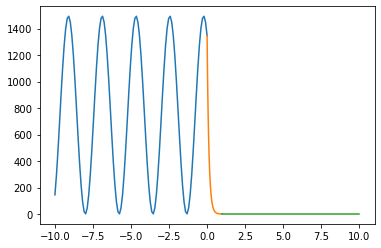

In [14]:
plt.plot(x1,abs(psi_I)**2)
plt.plot(x2,abs(psi_II)**2)
plt.plot(x3,abs(psi_III)**2)

A continuación, calcule el coeficiente de transmisión a diferentes energías y diferentes potenciales, cumpliendo $E<V$.

Para $V=2,4,8,16$:

1 Defina un conjunto de 100 energías de 0 a V. **Sugerencia.** Use numpy.linspace.

2 Calcule $k_2$

$$
k_2^2 = \frac{2m(V-E)}{\hbar^2}
$$

3 Calcule el coeficiente de transmisión. Recuerde

$$
T = \frac{16(E/V)(1-E/V)}{16(E/V)(1-E/V) + (e^{k_2L} - e^{-k_2L})^2}
$$

4 Grafique T vs E/V

In [15]:
# Gráficas

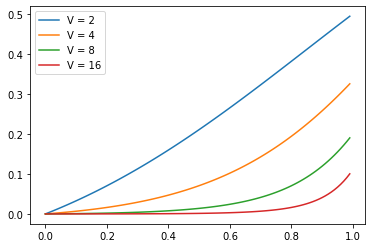

In [16]:
for V in [2,4,8,16]:
    
    E = np.linspace(0,V,100,endpoint=False)
    k2 = np.sqrt(2*m*(V-E)/hbar**2)
    T = 16*(E/V)*(1-E/V)/(16*(E/V)*(1-E/V) + (np.exp(k2*L) - np.exp(-k2*L))**2)
    plt.plot(E/V,T,label="V = "+str(V))
    plt.legend()

## Energía mayor que el potencial $E > V$

```{admonition} Para pensar
:class: tip

De manera clásica, cuando la partícula tiene mayor energía que el potencial, $E>V$, debería poder moverse sin ninguna restricción. ¿Qué pasará cuánticamente? 
```

El sistema puede analizarse por regiones
```{admonition} Inserto matemático: Hamiltoniano por regiones

| Región      | Hamiltoniano | Eigenfunción | Constantes |
|:----------------:|:---------:|:--------:|:--------:|
| ${\rm I}$ | $- \frac{\hbar^2}{2m} \frac{d^2}{dx^2}$ | $\psi_I(x) = Ae^{ik_1x} + Be^{-ik_1x}$ | $k_1^2 = \frac{2mE}{\hbar^2}$ |
| ${\rm II}$| $- \frac{\hbar^2}{2m} \frac{d^2}{dx^2} + V$ | $\psi_{II}(x) = C e^{ik_2x} + De^{-ik_2x}$ | $k_2^2 = \frac{2m(E-V)}{\hbar^2}$ |
| ${\rm III}$ | $- \frac{\hbar^2}{2m} \frac{d^2}{dx^2}$ | $\psi_{III}(x) = Fe^{ik_1x} + Ge^{-ik_1x}$ | $k_1^2 = \frac{2mE}{\hbar^2}$ |
```

Los coeficientes pueden obtenerse a partir de la condición de continuidad de la eigenfunción en $x=0$ y $x=L$
```{admonition} Inserto matemático: Condiciones de continuidad

| Regiones | Condición | Ecuación |
|:---: |:---: | :---:|
| ${\rm I}$ y ${\rm II}$ | $\psi_{\rm I}(0) = \psi_{II}(0)$ | $A + B = C + D$ |
| ${\rm I}$ y ${\rm II}$ | $\frac{d\psi_{\rm I}}{dx}(0) = \frac{d\psi_{\rm II}}{dx}(0)$ | $k_1 (A - B) = k_2 (C - D)$|
|   ${\rm III}$  | La partícula viaja hacia la derecha | $G = 0$ |
| ${\rm II}$ y ${\rm III}$ | $\psi_{\rm II}(L) = \psi_{III}(L)$ | $Ce^{ik_2L} + De^{-k_2L} = F e^{ik_1L}$|
| ${\rm II}$ y ${\rm III}$ | $\frac{d\psi_{\rm II}}{dx}(L) = \frac{d\psi_{\rm III}}{dx}(L)$ | $k_2 \left( C e^{ik_2L} + D e^{-ik_2L} \right)  = k_1F e^{ik_1L}$|

Al despejar, se obtiene

$$
C = \frac{F}{2} \left( 1 + \frac{k_1}{k_2} \right) e^{i(k_1-k_2)L}
$$

$$
D = \frac{F}{2} \left( 1 - \frac{k_1}{k_2} \right) e^{i(k_1+k_2)L}
$$

$$
A = \frac{1}{2} \left[ \left(1 + \frac{k_2}{k_1} \right)C + \left(1 - \frac{k_2}{k_1} \right)D \right]
$$
```

El coeficiente de transmisión se puede calcular al dividir el cuadrado del coeficiente de la parte de la función que representa el paso de partículas a la región ${\rm III}$ (coeficiente $F$), entre el cuadrado del coeficiente de la parte de la eigenfunción que representa a la partícula dirigiéndose hacia la región ${\rm I}$ (coeficiente $A$).

$$
T = \frac{4(E/V)(E/V-1)}{4(E/V)(E/V-1) + \sin^2(k_2L)}
$$

**De valores a las constantes del sistema**. Considere $m=1$, $\hbar=1$ y $L=1$. Asigne un valor de energía y potencial respetando la relación $E > V$, por ejemplo, $E=40$, $V=10$.

In [17]:
# m, hbar, L, E, V

In [18]:
m = 1
hbar = 1
L = 1
E = 40
V = 10

Defina $k_1$ y $k_2$ acorde a

$$
k_1 = \sqrt{\frac{2mE}{\hbar^2}}
$$

$$
k_2 = \sqrt{\frac{2m(E-V)}{\hbar^2}}
$$

In [19]:
#k1 y k2

In [20]:
k1 = np.sqrt(2*m*E/hbar**2)
k2 = np.sqrt(2*m*(E-V)/hbar**2)

A continuación graficaremos el cuadrado de la eigenfunción. Para ello, primero defina las siguientes constantes.

$$
C = \frac{F}{2} \left( 1 + \frac{k_1}{k_2} \right) e^{i(k_1-k_2)L}
$$

$$
D = \frac{F}{2} \left( 1 - \frac{k_1}{k_2} \right) e^{i(k_1+k_2)L}
$$

$$
A = \frac{1}{2} \left[ \left(1 + \frac{k_2}{k_1} \right)C + \left(1 - \frac{k_2}{k_1} \right)D \right]
$$

$$
B = C + D - A
$$

Considere

$$
F = 1
$$

In [21]:
# A, B, C, D, F

In [22]:
F = 1

C = F/2*(1 + k1/k2)*np.exp(1j*(k1-k2)*L)
D = F/2*(1 - k1/k2)*np.exp(1j*(k1+k2)*L)
A = 1/2*((1 + k2/k1)*C + (1 - k2/k1)*D)
B = C + D - A

Defina un dominio para $x$. Sugerencia: Use numpy.linspace

In [23]:
# Dominio de x

In [24]:
x1 = np.linspace(-2,0,100)
x2 = np.linspace(0,L,100)
x3 = np.linspace(L,2,100)

Defina la eigenfunción en las tres regiones según

$$
\psi(x) = \left\{
  \begin{array}{lll}
  A e^{ik_1x}+ B e^{-ik_1x}      & \mathrm{si\ } x < 0 & I\\
  C e^{ik_2x} + De^{-ik_2x} & \mathrm{si\ } 0 \leq x \leq L & II \\
  F e^{ik_1x}& \mathrm{si\ } L \le x & III \\
  \end{array}
  \right.
$$

In [25]:
# psi_I, psi_II y psi_III

In [26]:
psi_I = A*np.exp(1j*k1*x1) + B*np.exp(-1j*k1*x1)
psi_II = C*np.exp(1j*k2*x2) + D*np.exp(-1j*k2*x2)
psi_III = F*np.exp(1j*k1*x3)

Grafique el cuadrado de la eigenfunción.

In [27]:
# Grafica

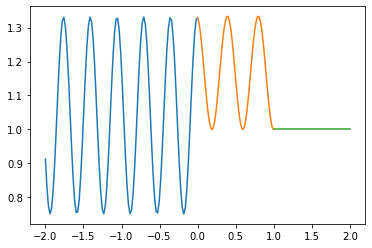

In [28]:
plt.plot(x1,abs(psi_I)**2)
plt.plot(x2,abs(psi_II)**2)
plt.plot(x3,abs(psi_III)**2)

Para $V=2,4,8,16$:

1 Defina un conjunto de 100 energías de V a 4V. **Sugerencia.** Use numpy.linspace.

2 Calcule $k_2$

3 Calcule el coeficiente de transmisión. Recuerde

4 Grafique T vs E/V

In [29]:
# Gráfica

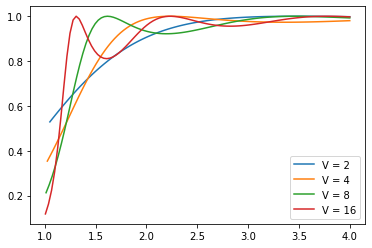

In [30]:
for V in [2,4,8,16]:
    
    E = np.linspace(V+0.1,4*V,100)
    k2 = np.sqrt(2*m*(E-V)/hbar**2)
    T = 4*(E/V)*(E/V-1)/(4*(E/V)*(E/V-1) + (np.sin(k2*L))**2)
    plt.plot(E/V,T,label="V = "+str(V))
    plt.legend()

````{admonition} Reto para aprender más
:class: seealso

Para ver una combinación del efecto túnel debido a una barrera de potencial a la mitad de la caja puede revisar el Notebook de [](CajaConTope.ipynb).
````